In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 분류 위한 라이브러리
# 로지스틱 회귀
from sklearn.linear_model import LogisticRegression
# 선형 판별 분석
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# train/test data set 분리 라이브러리
from sklearn.model_selection import train_test_split

# 성능 평가 라이브러리
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, accuracy_score
# confusion_matrix : 혼동 행렬
# precision_score : 정밀도
# recall_score : 재현율

# roc_auc_score : ROC 곡선 아래의 면적
# roc_curve : ROC 곡선을 그리기 위한 FPR, TPR 계산
# accuracy_score : 정확도


# 데이터 불러오기
from sklearn.datasets import load_iris

로지스틱 회귀_간단한 예제

In [2]:
# training data 정의
x = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y = np.array([0,0,0,1,1,1])
# 앞의 3개 음의 값 >> 0, 뒤에 3개 양의 값 >> 1

# test_data 정의
test_x = [[-2, 2]]

# 모두 양수일 확률
# test_x = [[2, 2]]

In [9]:
print(x)
print()
print(y)

[[-1 -1]
 [-2 -1]
 [-3 -2]
 [ 1  1]
 [ 2  1]
 [ 3  2]]

[0 0 0 1 1 1]


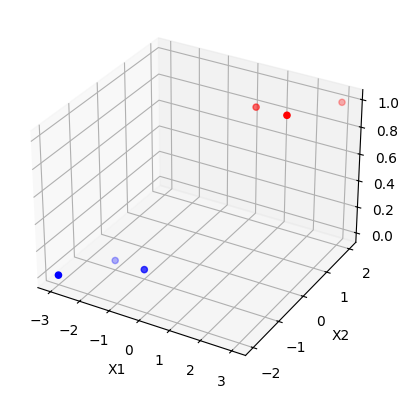

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # 3D 그래프를 위한 모듈

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter([-1, -2, -3], [-1, -1, -2], [0, 0, 0], color='blue')
ax.scatter([1, 2, 3], [1, 1, 2], [1, 1, 1], color='red')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

plt.show()

In [4]:
# 훈련
lr = LogisticRegression()
lr.fit(x, y)

LogisticRegression()

In [5]:
# 클래스 확률 예측
lr.predict_proba(test_x)
# 클래스가 0(모두 음수일 확률) 이 60.79%
# 클래스가 1(모두 양수일 확률) 이 95.1%

array([[0.60798904, 0.39201096]])

In [6]:
lr.predict(test_x)

array([0])

선형판별분석(LDA) 간단한 예제

In [16]:
lda = LinearDiscriminantAnalysis()
lda.fit(x,y)

LinearDiscriminantAnalysis()

In [17]:
lda.predict_proba(test_x)

array([[1.12535162e-07, 9.99999887e-01]])

In [18]:
lda.predict(test_x)

array([1])

HEART 데이터 분석

In [20]:
pd.read_csv('Heart.csv', index_col=0)

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


In [21]:
heart = pd.read_csv('Heart.csv', index_col=0)
heart.head(3)

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes


In [22]:
# 독립변수, 종속변수
x = heart[["Age",'Sex','Chol']]
y = heart['AHD']

In [23]:
# 훈련용 / 평가용 데이터 분리

x_train, x_test, y_train, y_test =\
train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [24]:
# 훈련
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)

LinearDiscriminantAnalysis()

In [25]:
# 테스트 데이터 사용, 예측
y_pred = lda.predict(x_test)

In [26]:
y_pred

array(['Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No',
       'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No',
       'Yes'], dtype='<U3')

In [27]:
y_test

220     No
272     No
90      No
102     No
68      No
      ... 
286    Yes
244    Yes
95      No
292     No
156    Yes
Name: AHD, Length: 61, dtype: object

In [28]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred) # 실제 값, 예측 값
cm

array([[23, 10],
       [11, 17]])

In [29]:
# 분류 결과 평가

# precision (정밀도)  TP / (TP+FP)
precision_score(y_test, y_pred, average='macro')

0.6530501089324618

In [30]:
# Recall(재현율) TP / (TP+FN)
recall_score(y_test, y_pred, average='macro')

0.652056277056277

In [31]:
# accuracy (정확도) (TP+TN) / ALL
accuracy_score(y_test, y_pred)

0.6557377049180327

Iris data 예제

In [32]:
x_iris, y_iris = load_iris(return_X_y=True)
# X,y 형태로 데이터를 받겠다는 의미

In [34]:
x_iris[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [36]:
y_iris
# 0,1,2 >> 3가지 클래스가 존재

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [38]:
# 훈련
lr = LogisticRegression(random_state=42)
lr.fit(x_iris, y_iris)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [39]:
# 클래스 예측
lr.predict(x_iris)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [40]:
# 클래스 예측 (비율)
lr.predict_proba(x_iris)

array([[9.81814913e-01, 1.81850723e-02, 1.43960976e-08],
       [9.71755297e-01, 2.82446727e-02, 3.01076466e-08],
       [9.85463233e-01, 1.45367551e-02, 1.23031068e-08],
       [9.76312207e-01, 2.36877535e-02, 3.96564575e-08],
       [9.85396856e-01, 1.46031318e-02, 1.19202313e-08],
       [9.70481425e-01, 2.95185016e-02, 7.33813741e-08],
       [9.86898273e-01, 1.31017073e-02, 1.99463422e-08],
       [9.76418120e-01, 2.35818523e-02, 2.75765278e-08],
       [9.79860025e-01, 2.01399439e-02, 3.06393628e-08],
       [9.69157991e-01, 3.08419778e-02, 3.15873199e-08],
       [9.76523568e-01, 2.34764131e-02, 1.91763097e-08],
       [9.75422278e-01, 2.45776784e-02, 4.37767353e-08],
       [9.74583207e-01, 2.54167711e-02, 2.14437755e-08],
       [9.91980685e-01, 8.01931086e-03, 3.88786017e-09],
       [9.88217048e-01, 1.17829488e-02, 2.79979676e-09],
       [9.86782344e-01, 1.32176434e-02, 1.27599338e-08],
       [9.88128243e-01, 1.18717479e-02, 9.17831577e-09],
       [9.81572611e-01, 1.84273

In [41]:
# accuracy
lr.score(x_iris, y_iris)

0.9733333333333334